# 1. Discrete Random Variables

For a discrete random variable $X$, we define the probability mass function $p(\alpha)$ of $X$ by

$$
p(\alpha) = P(X = \alpha)
$$

The probability mass function $p(\alpha)$ is positive for at most a countable number of values of $a$. That is, if $X$ must assume one of the values $x_1, x_2,\dots ,$ then

$$
p(x_i) \geq 0 \text{ for } i = 1, 2, \dots
$$

and

$$
\sum_{i=1}^{\infty} p(x_i) = 1
$$

The cumulative distribution function $F(x)$ can be expressed in terms of $p(\alpha)$ by

$$
F(\alpha) = P(X \leq \alpha) = \sum_{x_i \leq \alpha} p(x_i)
$$

### Expectation of a Random Variable in Discrete Case

If $X$ is a discrete random variable having a probability mass function $p(x)$, then the expected value of $X$ is defined by

$$
E(X) = \sum_{x_i} x_i p(x_i)
$$




## 1.1 Bernoulli Random Variable

A Bernoulli random variable is a discrete random variable that takes the value 1 with probability $p$ and the value 0 with probability $1-p$. The probability mass function of a Bernoulli random variable $X$ is given by
$$
p(x) = \begin{cases}
1-p & \text{if } x = 0 \\
p & \text{if } x = 1
\end{cases}
$$

The expected value of a Bernoulli random variable is given by
$$
E(X) = 0 \cdot (1-p) + 1 \cdot p = p
$$

The variance of a Bernoulli random variable is given by
$$
Var(X) = E(X^2) - (E(X))^2 = p - p^2 = p(1-p)
$$

In [2]:
# Necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import poisson

In [3]:
def bernoulli(p):
    """
    Bernoulli distribution with parameter p.
    """
    return np.random.binomial(1, p)
def binomial(n, p):
    """
    Binomial distribution with parameters n and p.
    """
    return np.random.binomial(n, p)
def geometric(p):
    """
    Geometric distribution with parameter p.
    """
    return np.random.geometric(p)
def negative_binomial(n, p):
    """
    Negative binomial distribution with parameters n and p.
    """
    return np.random.negative_binomial(n, p)

## 1.2 Binomial Random Variable

Suppose that $n$ independent trials, each of which results in a “success” with probability $p$ and in a “failure” with probability $1−p$, are to be performed. If $X$ represents the number of successes that occur in the $n$ trials, then $X$ is said to be a binomial random variable with parameters $n, p$. The probability mass function of a binomial random variable having parameters
$(n, p)$ is given by

$$
p(x) = \binom{n}{x} p^x (1-p)^{n-x}, \quad x = 0, 1, \dots, n
$$

where $\binom{n}{x} = \frac{n!}{x!(n-x)!}$ is the binomial coefficient, which counts the number of ways to choose $x$ successes from $n$ trials.

### Expectation of a Binomial Random Variable

If $X$ is a binomial random variable with parameters $n$ and $p$, then the expected value of $X$ is given by
$$
E(X) = np
$$
### Variance of a Binomial Random Variable
If $X$ is a binomial random variable with parameters $n$ and $p$, then the variance of $X$ is given by
$$
Var(X) = np(1-p)
$$
    

## The Poisson Random Variable

A random variable $X$ taking on one of the values $0, 1, 2, \dots,$ is said to be a Poisson random variable with parameter $\lambda$, if for some $\lambda > 0$,

$$
p(i) = P \{ X = i \} = e^{-\lambda} \frac{\lambda^i}{i!}, \quad i = 0, 1, \ldots
$$

### Expectation of a Poisson Random Variable

If $X$ is a Poisson random variable with parameter $\lambda$, then the expected value of $X$ is given by

$$
E(X) = \sum_{i=0}^{\infty} i e^{-\lambda} \frac{\lambda^i}{i!}
= e^{-\lambda} \sum_{i=1}^{\infty} \frac{\lambda^i}{(i-1)!}
= e^{-\lambda} \lambda \sum_{i=0}^{\infty} \frac{\lambda^i}{i!}
= e^{-\lambda} \lambda e^{\lambda}
= \lambda
$$

where we have used the identity $\sum_{i=0}^{\infty} \frac{\lambda^i}{i!} = e^{\lambda}$.

In [4]:
def poisson(m, k):
    """
    Calculate the Poisson probability of observing k events in an interval
    given the average rate of occurrence n.

    :param m: Average rate of occurrence (lambda)
    :param k: Number of events
    :return: Probability of observing k events
    """
    from math import exp, factorial

    return (m ** k) * exp(-m) / factorial(k)

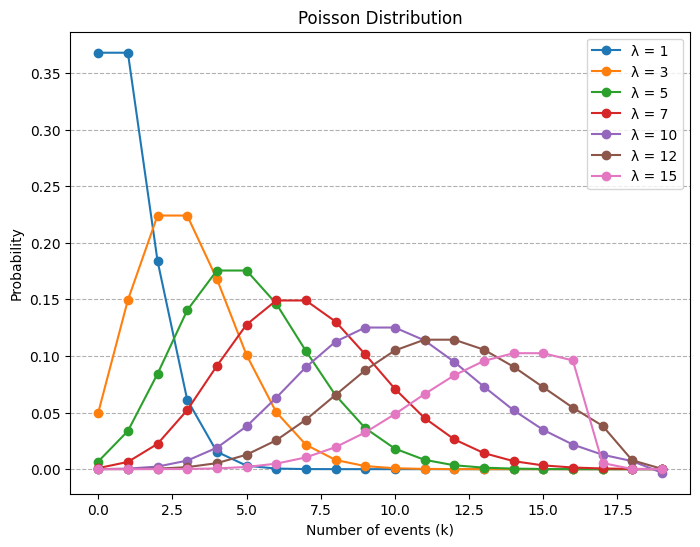

In [4]:
# Example usage
x = np.arange(0, 20) # Average rate of occurrence
lambdas = [1, 3, 5, 7, 10, 12,15] # Different values of lambda

           
plt.figure(figsize=(8, 6))

for lam in lambdas:
    pmf = [poisson(lam, k) for k in x]
    # Using scipy's poisson distribution for comparison
    # pmf_scy = poisson.pmf(x, lam)
    plt.plot(x, pmf, marker='o', label=f'λ = {lam}')

plt.xlabel('Number of events (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.grid(axis=  "y" , linestyle='--')
plt.legend()
plt.show()


# 2. Continuous Random Variables
The function $f(x)$ is called the *probability density function* of the random variable $X$.
$$
P \{X \in B \} = \int_B f(x) dx \tag{1}
$$

The probability that $X$ will be in $B$ may be obtained by integrating the probability density function over the set $B$.

$$
P\{X \in (-\infty, \infty)\} = \int_{-\infty}^{\infty} f(x) \, dx = 1
$$


All probability statements about $X$ can be answered in terms of $f(x)$. For instance, letting $B = [a, b]$, we obtain

$$
P\{a \leq X \leq b \} = \int_a^b f(x) \, dx \tag{2}
$$

The relationship between the cumulative distribution $F(\cdot)$ and the probability density $f(\cdot)$ is expressed by

$$
F(\alpha) = P\{X \in (-\infty, \alpha]\} = \int_{-\infty}^{\alpha} f(x) \, dx
$$

Differentiating both sides of the preceding yields
$$
\frac{d}{d\alpha} F(\alpha) = f(\alpha)
$$

That is, the density is the derivative of the cumulative distribution function. A somewhat more intuitive interpretation of the density function may be obtained from Equation (2) as

$$
P\{\alpha-\frac{\epsilon}{2} \leq X \leq \alpha+\frac{\epsilon}{2} \} = \int_{\alpha-\frac{\epsilon}{2}}^{a+\frac{\epsilon}{2}} f(x) \, dx  \approx \epsilon f(x)
$$

when $\epsilon$ is small. In other words, the probability that $X$ will be contained in an interval of length $\epsilon$ around the point $\alpha$ is approximately $\epsilon f(a)$.


### Expectation of a Random Variable in Continuous Case
If $X$ is a continuous random variable having a probability density function $f(x)$, then the expected value of $X$ is defined by
$$
E(X) = \int_{-\infty}^{\infty} x f(x) \, dx
$$

## 2.1 Exponential Random Variables
A continuous random variable whose probability density function is given, for
some $\lambda > 0$, by:
$$
f(x) = \begin{cases}
\lambda e^{-\lambda x} & x \geq 0 \\
0 & x < 0
\end{cases}
$$

is said to be an exponential random variable with parameter $\lambda$, which is the mean of the distribution. The cumulative distribution function is given by

$$
F(\alpha) =  \int_0^\alpha \lambda e^{-\lambda x} \, dx, = 1-e^{-\lambda \alpha}  \quad \alpha \geq 0
$$

Note that $F(\infty) = \int_0^\infty \lambda e^{-\lambda x} \, dx = 1$.

### Expectation of an Exponential Random Variable
If $X$ is an exponential random variable with parameter $\lambda$, then the expected value of $X$ is given by
$$
E(X) = \int_0^\infty x \lambda e^{-\lambda x} \, dx
$$

Integration by parts ($dv = \lambda e^{-\lambda x}, u = x$) yields
$$
E(X) = \left[ -\frac{x}{\lambda} e^{-\lambda x} \right]_0^\infty + \frac{1}{\lambda} \int_0^\infty e^{-\lambda x} \, dx
= 0 + \frac{1}{\lambda} \cdot \frac{1}{\lambda} = \frac{1}{\lambda}
$$


In [5]:
def exponential(x, m):
    """
    Calculate the Exponential probability density function (PDF) for a given x and rate parameter m.

    :param x: Value at which to evaluate the PDF
    :param m: Rate parameter (1/lambda)
    :return: Probability density at x
    """
    from math import exp

    return m * exp(-m * x) if x >= 0 else 0

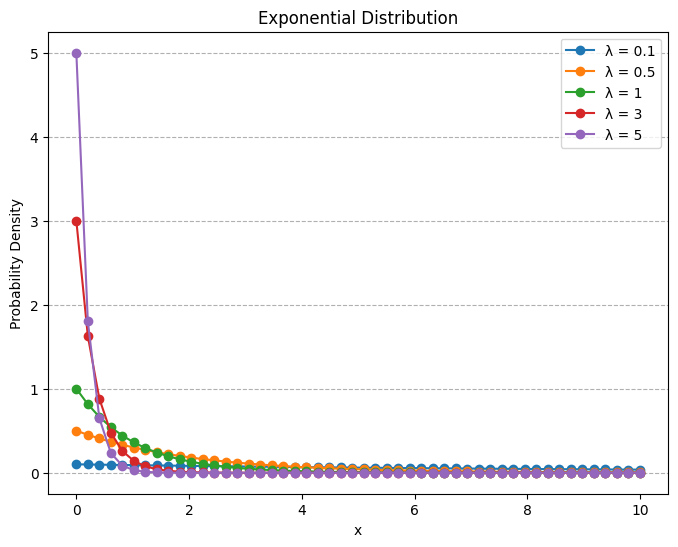

In [6]:
x = np.linspace(0, 10, 50)
lamdas = [0.1, 0.5, 1, 3, 5] # Different values of lambda

plt.figure(figsize=(8, 6))# Plotting the Exponential distribution
for lam in lamdas:
    pdf = [exponential(i, lam) for i in x]
    plt.plot(x, pdf, marker='o', label=f'λ = {lam}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Exponential Distribution')
plt.grid(axis=  "y" , linestyle='--')
plt.legend()
plt.show()

## 2.2 Gamma Random Variables

A continuous random variable whose density is given by:
$$
f(x) = \begin{cases}
\frac{\lambda e^{- \lambda x} {(\lambda x)}^{\alpha-1}}{\Gamma (\alpha)} & x \geq 0 \\
0 & x < 0
\end{cases}
$$

for some $\lambda>0$ and $\alpha>0$ is said to be a gamma random variable with parameters
$\alpha, \lambda$. 

The quantity $\Gamma (\alpha)$ is called the gamma function and is defined by

$$
\Gamma (\alpha) = \int_0^\infty e^{-x} x^{\alpha-1} \, dx = (\alpha-1)!
$$

### Expectation of a Gamma Random Variable
If $X$ is a gamma random variable with parameters $\alpha$ and $\lambda$, then the expected value of $X$ is given by
$$
E(X) = \int_0^\infty x \frac{\lambda e^{- \lambda x} {(\lambda x)}^{\alpha-1}}{\Gamma (\alpha)} \, dx
= \frac{1}{\lambda} \int_0^\infty e^{-x} x^{\alpha} \, dx
= \frac{1}{\lambda} \cdot \Gamma (\alpha + 1)
= \frac{1}{\lambda} \cdot \alpha \Gamma (\alpha)
= \frac{\alpha}{\lambda}
$$


In [7]:
def gamma(x, alpha, lamd):
    """
    Calculate the Gamma probability density function (PDF) for a given x, shape parameter alpha, and scale parameter lamd.

    :param x: Value at which to evaluate the PDF
    :param alpha: Shape parameter (alpha)
    :param lamd: Scale parameter (lamda)
    :return: Probability density at x
    """
    from math import exp, factorial

    return (lamd*exp(-lamd*x)*((lamd*x)**(alpha-1)))/factorial(alpha) if x >= 0 else 0

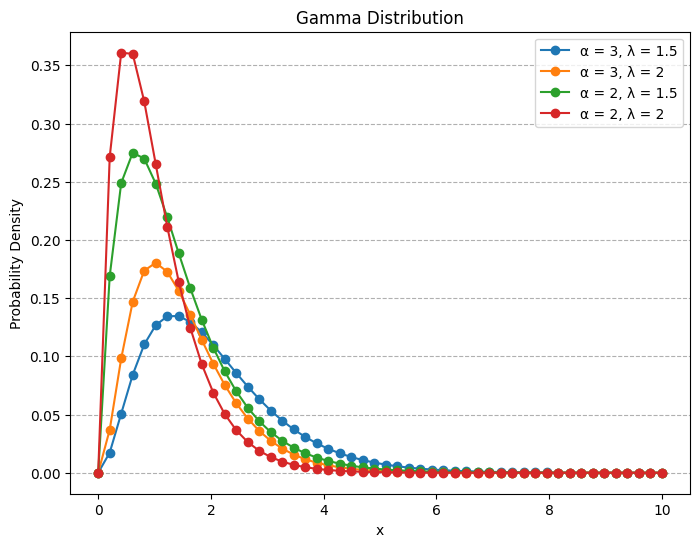

In [12]:
x = np.linspace(0, 10, 50) # Range of x values for the gamma distribution
alpha_values = [3, 2] # Different values of alpha (shape parameter)
lambdas = [1.5,  2] # Different values of lambda (scale parameter)
plt.figure(figsize=(8, 6)) # Plotting the Gamma distribution
for alpha in alpha_values:
    for lam in lambdas:
        pdf = [gamma(i, alpha, lam) for i in x]
        plt.plot(x, pdf, marker='o', label=f'α = {alpha}, λ = {lam}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gamma Distribution')
plt.grid(axis=  "y" , linestyle='--')
plt.legend()
plt.show()


## 2.3 Normal Random Variables

We say that $X$ is a normal random variable (or simply that $X$ is normally distributed) with parameters $\mu$ and $\sigma ^2$ if the density of X is given by

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\mu)/ 2\sigma^2} \quad -\infty < x < \infty
$$

This density function is a bell-shaped curve that is symmetric around $\mu$.

The mean of the normal distribution is $\mu$ and the variance is $\sigma^2$. The cumulative distribution function is given by

$$
F_X(\alpha) = P(X \leq \alpha) = \int_{-\infty}^ \alpha \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\mu)/ 2\sigma^2} \, dx
$$

### Expectation of a Normal Random Variable
If $X$ is a normal random variable with parameters $\mu$ and $\sigma^2$, then the expected value of $X$ is given by
$$
E(X) = \int_{-\infty}^\infty x \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\mu)/ 2\sigma^2} \, dx
= \mu \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\mu)/ 2\sigma^2} \, dx
= \mu \cdot 1
= \mu
$$




In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
def normal(x, mu, sigma):
    """
    Calculate the Normal probability density function (PDF) for a given x, mean mu, and standard deviation sigma.

    :param x: Value at which to evaluate the PDF
    :param mu: Mean of the distribution
    :param sigma: Standard deviation of the distribution
    :return: Probability density at x
    """
    from math import exp, pi

    return (1 / (sigma * (2 * pi) ** 0.5)) * exp(-0.5 * ((x - mu) / sigma) ** 2)
    

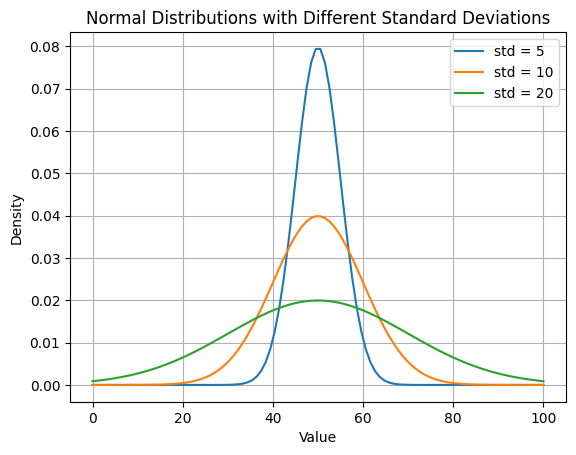

In [11]:
# Example usage
mu =50 # Mean of the distribution
std_devs = [5, 10, 20] # Different standard deviations

# X range for plotting
x = np.linspace(0, 100, 100) 

# Plot each distribution
for sigma in std_devs:
    # y = norm.pdf(x, loc=mu, scale=sigma)
    y = [normal(i, mu, sigma) for i in x]
    plt.plot(x, y, label=f'std = {sigma}')

plt.title('Normal Distributions with Different Standard Deviations')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## Expectation of a Function of a Random Variable

### In Discrete Case
If $X$ is a discrete random variable having a probability mass function $p(x)$, and $g(x)$ is a function of $x$, then the expected value of $g(X)$ is defined by
$$
E(g(X)) = \sum_{x_i} g(x_i) p(x_i)
$$
### In Continuous Case
If $X$ is a continuous random variable having a probability density function $f(x)$, and $g(x)$ is a function of $x$, then the expected value of $g(X)$ is defined by
$$
E(g(X)) = \int_{-\infty}^{\infty} g(x) f(x) \, dx
$$

# Jointly Distributed Random Variables

We are often interested in probability statements concerning two or more random variables. To deal with such probabilities, we define, for any two random variables $X$ and $Y$, the joint cumulative probability distribution function of $X$ and $Y$ by

$$
F(a,b) = P(X \leq a, Y \leq b), \quad -\infty < a,b < \infty
$$

The cumulative distribution of $X$ can be obtained from the joint distribution of $X$ and $Y$ as follows:

$$
\begin{align*}
F_X(a) &= P(X \leq a) \\
& = P(X \leq a, Y \leq \infty) \\
& = F(a, \infty) \\
\end{align*}
$$

Similarly, the cumulative distribution of $Y$ can be obtained from the joint distribution of $X$ and $Y$ as follows:
$$
F_Y(b) = P(Y \leq b) = F(\infty, b)
$$


### Discrete Case
In the case where $X$ and $Y$ are both discrete random variables, it is convenient to define the *joint probability mass function* of X and Y by

$$
p(x,y) = P(X = x, Y = y)
$$

The probability mass function of $X$ can be obtained from $p(x,y)$ by
$$
p_X(x) = P(X = x) = \sum_{y:p(x,y)>0} p(x,y)
$$
Similarly, the probability mass function of $Y$ can be obtained from $p(x,y)$ by
$$
p_Y(y) = P(Y = y) = \sum_{x:p(x,y)>0} p(x,y)
$$


### Continuous Case
We say that $X$ and $Y$ are *jointly continuous* if there exists a function $f(x,y)$, defined for all real $x$ and $y$, having the property that for all sets of $A$ and $B$ of real numbers,
$$
P(X \in A, Y \in B) = \int_B \int_A f(x,y) \, dx \, dy
$$

The function $f(x,y)$ is called the *joint probability density function* of $X$ and $Y$. The probability density function of $X$ can be obtained from a knowledge of $f(x,y)$ by following reasoning:
$$
\begin{align*}
P(X \in A) &= P(X \in A, Y \in (-\infty, \infty)) \\
&= \int_{-\infty}^{\infty} \int_A f(x,y) \, dx \, dy \\
&= \int_A f_X(x) \, dx \\
\end{align*}
$$

where

$$
f_X(x) = \int_{-\infty}^{\infty} f(x,y) \, dy
$$

is thus the probability density function of $X$ (Marginal density). Similarly, the probability density function of $Y$ can be obtained from a knowledge of $f(x,y)$ by
$$
f_Y(y) = \int_{-\infty}^{\infty} f(x,y) \, dx
$$

Since cumulative distribution function is defined as
$$
F(a,b) = P(X \leq a, Y \leq b) = \int_{-\infty}^a \int_{-\infty}^b f(x,y) \, dx \, dy
$$

differentiation yields
$$
\frac{\partial^2}{\partial a \partial b} F(a,b) = f(a,b)
$$

Thus, as in the single variable case, differentiating the probability distribution function gives the probability density function.

### Expectation of one random variable for jointly distributed random variables

#### In Discrete Case

In the discrete case, if $X$ and $Y$ are jointly distributed random variables, then the expected value of $X$ is given by
$$
E(X) = \sum_{x_i} \sum_{y_j} x_i p(x_i,y_j)
$$
and the expected value of $Y$ is given by
$$
E(Y) = \sum_{x_i} \sum_{y_j} y_j p(x_i,y_j)
$$


#### In Continuous Case

The expected value of $X$ is given by

$$
E(X) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} x f(x,y) \, dx \, dy
$$


Similarly, the expected value of $Y$ is given by
$$
E(Y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} y f(x,y) \, dx \, dy
$$

### Expectation of a Function of a Two Random Variables

If $X$ and $Y$ are random variables and $g$ is a function of two variables, then

$$
\begin{align*}
E(g(X,Y)) &= \sum_{x_i} \sum_{y_j} g(x_i,y_j) p(x_i,y_j) \quad \text{ in the discrete case} \\
 &= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(x,y) f(x,y) \, dx \, dy \quad \text{ in the continuous case}
\end{align*}
$$


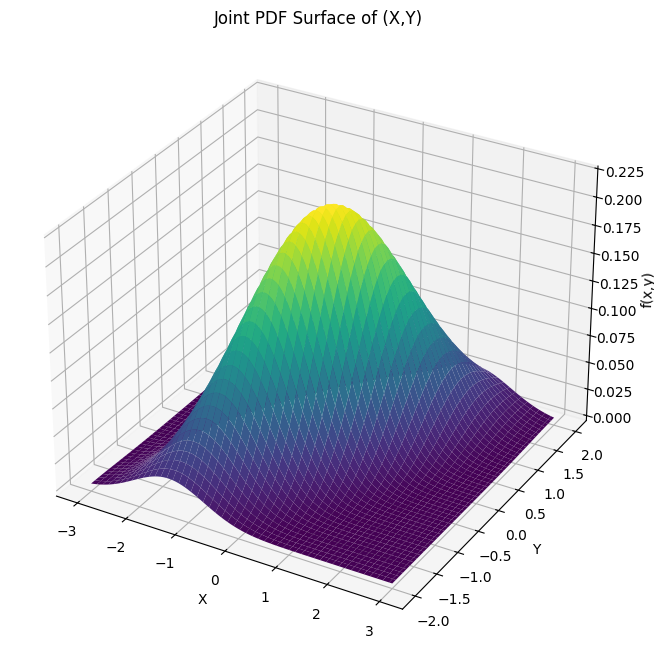

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Mean vector and covariance matrix
mu = [0, 0]  # Mean at (0, 0)
Sigma = [[1, 0.7], [0.7, 1]]  # Covariance matrix

# Create the multivariate normal distribution
rv = multivariate_normal(mean=mu, cov=Sigma)
Z = rv.pdf(np.dstack((X, Y)))

# Plot the surface
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x,y)')
ax.set_title('Joint PDF Surface of (X,Y)')

plt.show()

## Independent Random Variables

The random variables $X$ and $Y$ are said to be independent if, for all $a, b,$
$$
P(X \leq a, Y \leq b) = P(X \leq a) P(Y \leq b)
$$

In terms of the joint cumulative distribution function, this means that
$$
F(a,b) = F_X(a) F_Y(b)
$$

When $X$ and $Y$ are discrete random variables, the independence condition can be expressed as
$$
p(x,y) = p_X(x) p_Y(y)
$$

When $X$ and $Y$ are joint continuous, the independence reduces to
$$
f(x,y) = f_X(x) f_Y(y)
$$

### Proof for discrete case
Suppose that the joint probability mass function $p(x,y)$, then

$$
\begin{align*}
P(X \leq a, Y \leq b) &= \sum_{y \leq b} \sum_{x \leq a} p(x,y) \\
&= \sum_{y \leq b} \sum_{x \leq a} p_X(x) p_Y(y) \\
&= \left( \sum_{x \leq a} p_X(x) \right) \left( \sum_{y \leq b} p_Y(y) \right) \\
&= P(X \leq a) P(Y \leq b)
\end{align*}
$$

and so $X$ and $Y$ are independent.

### Proof for continuous case
Suppose that the joint probability density function $f(x,y)$, then
$$
\begin{align*}
P(X \leq a, Y \leq b) &= \int_{-\infty}^a \int_{-\infty}^b f(x,y) \, dx \, dy \\
&= \int_{-\infty}^a \int_{-\infty}^b f_X(x) f_Y(y) \, dx \, dy \\
&= \left( \int_{-\infty}^a f_X(x) \, dx \right) \left( \int_{-\infty}^b f_Y(y) \, dy \right) \\
&= P(X \leq a) P(Y \leq b)
\end{align*}
$$



## Covariance and Variance of Sums of Random Variables

The covariance of any two random variables $X$ and $Y$, denoted by $Cov(X,Y)$, is defined by
$$
Cov(X,Y) = E[(X - E(X))(Y - E(Y))] = E(XY) - E(X)E(Y)
$$
The variance of a random variable $X$, denoted by $Var(X)$, is defined by
$$
Var(X) = E[(X - E(X))^2] = E(X^2) - (E(X))^2
$$

## Moment Generating Functions